In [491]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr, normaltest
from bioinfokit.visuz import cluster
import seaborn as sns
import matplotlib.pyplot as plt
import pca as pc_analysis

# local code
from source.get_elements      import get_elements

In [492]:
data = pd.read_csv("../data/interim/data_analysis_ready.csv") # load compositional data prepared for analysis
elements = get_elements(data.columns) # get list of elements from dataframe columns

In [493]:
# create correlation matrix
corr_matrix = data[elements].corr(method="pearson")

# set values for upper triangle of corr. matrix to NaN so that redundant data not included in plot
upper_tri_indices = np.triu_indices(corr_matrix.shape[0], m=len(elements))
upper_tri_ind_tuples = [(n,m) for n,m in zip(upper_tri_indices[0], upper_tri_indices[1])]
for tup in upper_tri_ind_tuples: 
    corr_matrix.iloc[tup] = np.nan

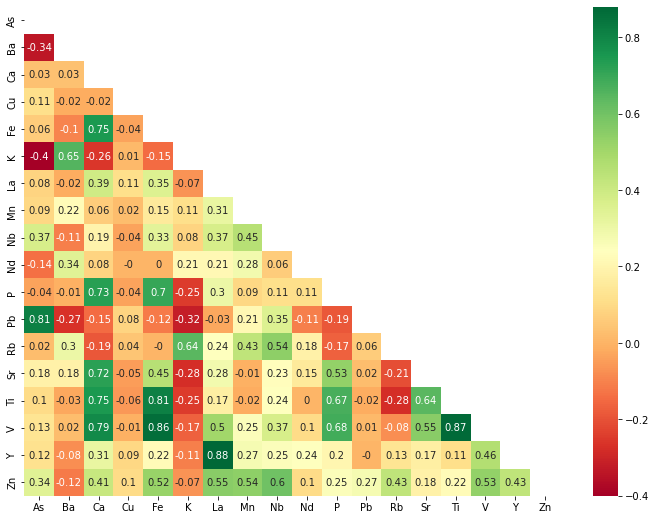

In [494]:
# plot corr. matrix
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(corr_matrix.round(decimals=2), annot=True, cmap="RdYlGn")

plt.show()

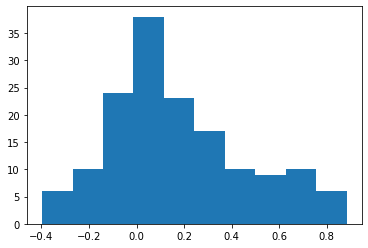

In [495]:
# plot distribution of Pearson correlation coefficients
plt.hist(corr_matrix.to_numpy().flatten());

In [496]:
# evaluate normality; transform accordingly
for element in elements: 
    log_normal = np.log10(data[element])
    # compare p-values from normality test of data and log-transformed data
    # (Null hypothesis: sample comes from a normal distribution; higher p ~ higher likelihood of normality)
    if normaltest(data[element])[1] < normaltest(log_normal)[1]: 
        data[element] = log_normal
    else: 
        print(element + " data were already normally distributed.")

Ba data were already normally distributed.
K data were already normally distributed.
Nd data were already normally distributed.
Zn data were already normally distributed.


In [497]:
# function to center and scale dataset (i.e., normalize)
def center_scale(x):
    mean = np.mean(x)
    std = np.std(x)
    x = (x - mean) / std

    return x

In [498]:
for element in elements:
    data[element] = center_scale(data[element])

In [499]:
data

,Unnamed: 0,sample_id,As,Ba,Ca,Cu,Fe,K,Mn,P,...,Rb,Sr,Ti,V,Zn,Nb,Y,La,Nd,comments
0,15,GR1-009,-0.343875,1.037494,-0.695370,-0.107248,-0.542798,1.002065,0.008869,-0.745734,...,0.775097,-0.915451,-0.849606,-0.789440,0.345981,-1.672981,-1.070418,0.077452,0.642197,NaN
1,17,GR1-013,0.386433,-0.346165,0.435649,-0.107248,-0.056429,-0.593679,1.039153,0.260792,...,-0.301682,0.967795,-0.406102,-0.260826,0.668168,-0.595522,-0.300448,0.869200,0.036764,NaN
2,18,TE2-005,0.467613,1.621897,-0.750883,0.504396,0.319315,1.751371,3.287932,0.081261,...,2.257382,-1.024348,-0.211537,0.684557,2.080834,2.578151,0.766538,1.014969,2.382818,NaN
3,19,TE2-018,0.592395,-1.575128,0.682685,2.076610,-1.105537,-1.917453,0.793917,-0.918628,...,-0.271482,-0.339722,-1.769826,-1.152872,1.306346,-0.649457,1.038107,0.533019,-0.139821,NaN
4,20,TE2-024,-1.559179,0.358556,-1.013134,-0.875841,-0.720605,0.724544,-1.450178,-1.211163,...,-0.271482,-1.009038,-1.112576,-1.445101,-1.370284,-1.672981,-1.476111,-2.550432,-2.132706,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,190,TE2-054,1.157729,-0.311788,1.354848,1.248175,1.670160,-0.088591,1.219119,0.900533,...,-0.564896,0.592684,1.330386,1.599283,1.986656,0.270674,0.634491,0.077452,0.162896,NaN
125,191,TE2-051,0.982926,0.006196,1.452764,0.562339,1.631179,0.066820,0.590157,1.711813,...,0.568668,1.224593,1.533613,1.447269,0.844132,0.981281,1.226828,1.054390,-2.712912,NaN
126,192,GR1-053,-0.726652,0.195267,0.869566,-0.645568,1.124523,0.755071,0.644684,0.882899,...,0.138456,0.355919,0.656412,0.818503,1.384414,1.038561,1.559451,1.356581,0.894461,added this entry after reviewing XRF data file...
127,193,TE2-009,-0.570827,0.289803,-0.378335,0.039555,-0.310858,1.471075,-0.388256,-0.072593,...,0.806179,-0.256431,-0.464733,-0.428938,-0.694930,-0.299275,-0.237863,0.423125,1.575574,bag unlabelled; we believe it is TE2-009 as th...


In [500]:
pca = PCA()

In [501]:
pca_results = pca.fit(data[elements])
data_pca = data.copy()
data_pca[elements] = pca.transform(data[elements])

# replace headers 
columns = data.columns
i=1
cols=[]
for column in columns: 
    if column in elements:
        cols.append("PC"+str(i))
        i+=1
    else: 
        cols.append(column)

data_pca.columns = cols
data_pca.head()

,Unnamed: 0,sample_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,comments
0,15,GR1-009,2.268515,-1.321516,1.401593,0.239767,-0.326876,0.358045,-0.442052,0.896157,...,0.619315,-0.145579,-0.259198,0.058305,0.240466,-0.717323,-0.158122,0.324135,0.425997,NaN
1,17,GR1-013,-0.866767,0.696403,0.172333,0.266401,-0.680925,-0.099274,-1.515382,0.502775,...,-0.545964,0.434331,-0.124501,-0.198264,0.131454,-0.631594,-0.415645,-0.444901,0.065479,NaN
2,18,TE2-005,-2.570710,-0.419988,5.488917,-0.965404,-0.360514,-1.608683,0.304284,-0.727719,...,-0.213131,0.307391,-0.386891,-0.163453,0.034736,-0.211088,0.545451,1.244617,1.020030,NaN
3,19,TE2-018,-0.062043,3.102248,1.125142,2.342226,-1.411436,1.228477,-1.229650,0.529734,...,-0.098251,-0.231525,0.215151,0.342290,0.089057,0.597668,0.098911,0.027698,-0.477397,NaN
4,20,TE2-024,5.027290,-1.390877,-1.437142,-0.023266,1.545134,1.709894,-0.600448,-0.567370,...,0.675040,-0.432465,0.028325,-0.296991,-0.180028,0.807070,-0.065802,0.060470,-0.279893,NaN


In [502]:
var = pca_results.explained_variance_ratio_

loadings = pca_results.components_
pc_list = ["PC"+str(i) for i in list(range(1, pca_results.n_features_ + 1))]
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings["element"] = elements
loadings.set_index("element", inplace=True)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
element,,,,,,,,,,,,,,,,,,
As,-0.165362,0.430500,0.042597,-0.355858,-0.114264,-0.057402,-0.032482,-0.049564,-0.228181,-0.067748,-0.042626,0.393686,0.522442,0.054296,-0.346595,0.165451,-0.031966,0.033673
Ba,0.023587,-0.433982,0.169397,-0.300085,-0.315040,0.107902,-0.301189,-0.041194,-0.126498,0.397055,-0.176179,-0.109525,0.263658,-0.237721,0.083258,-0.083712,0.359461,-0.056426
Ca,-0.318097,-0.183042,-0.130272,0.014950,-0.126967,0.187323,-0.100574,-0.261221,0.223349,-0.280861,0.190472,0.235508,-0.295355,-0.105088,-0.203780,0.411696,0.434274,-0.012289
Cu,-0.135653,0.205406,0.158382,0.101995,-0.423370,0.664214,0.174550,0.372472,0.047233,-0.156015,0.071540,-0.257443,0.095194,0.071077,0.034443,-0.030023,-0.004706,0.010196
Fe,-0.326787,-0.127092,-0.120361,-0.097532,0.292149,0.066688,0.244333,-0.004234,-0.040387,-0.023869,0.295760,0.125902,0.200044,0.319158,0.143738,-0.518065,0.358658,-0.196087


In [503]:
sum([0.36338455, 0.16322004, 0.14707127, 0.06354324, 0.05636863,
       0.04729481, 0.03638272, 0.02960978])

0.9068750400000001

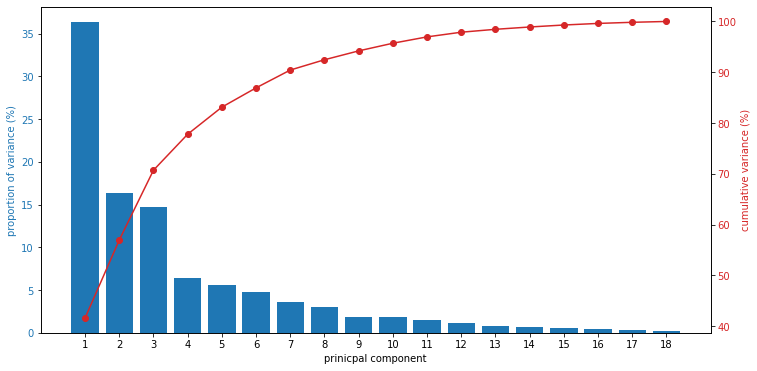

In [504]:
fig1, ax1 = plt.subplots(figsize=(12,6))

color1 = "tab:blue"
ax1.bar([str(x) for x in range(1,len(pc_list)+1)], 100*var, color=color1)
ax1.set_xlabel("prinicpal component")
ax1.set_ylabel("proportion of variance (%)", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)

color2 = "tab:red"
ax2 = ax1.twinx()
ax2.plot(100*cum_var, marker="o", color=color2)
ax2.set_ylabel("cumulative variance (%)", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)

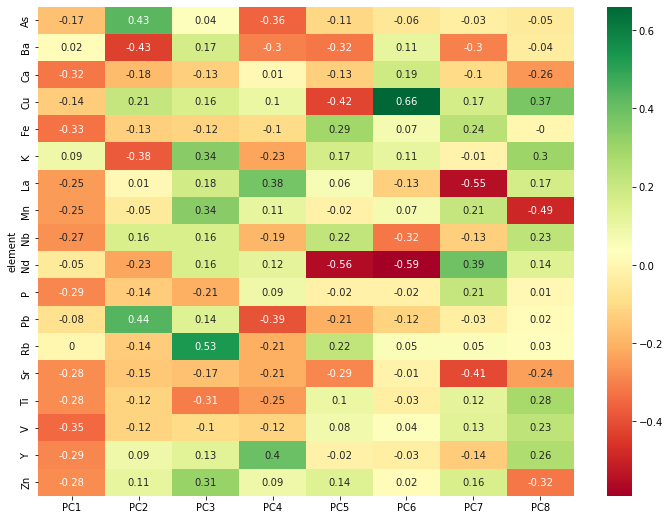

In [505]:
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(loadings.iloc[:,0:8].round(decimals=2), annot=True, cmap="RdYlGn")
plt.show()

In [506]:
data_pca_norm = data_pca.copy()
loadings_norm = loadings.copy()
for pc in pc_list:
    data_pca_norm[pc] = 2 * (data_pca[pc] - data_pca[pc].min()) / \
                        (data_pca[pc].max() - data_pca[pc].min()) - 1
    loadings_norm[pc] = 2 * (loadings[pc] - loadings[pc].min()) / \
                        (loadings[pc].max() - loadings[pc].min()) - 1

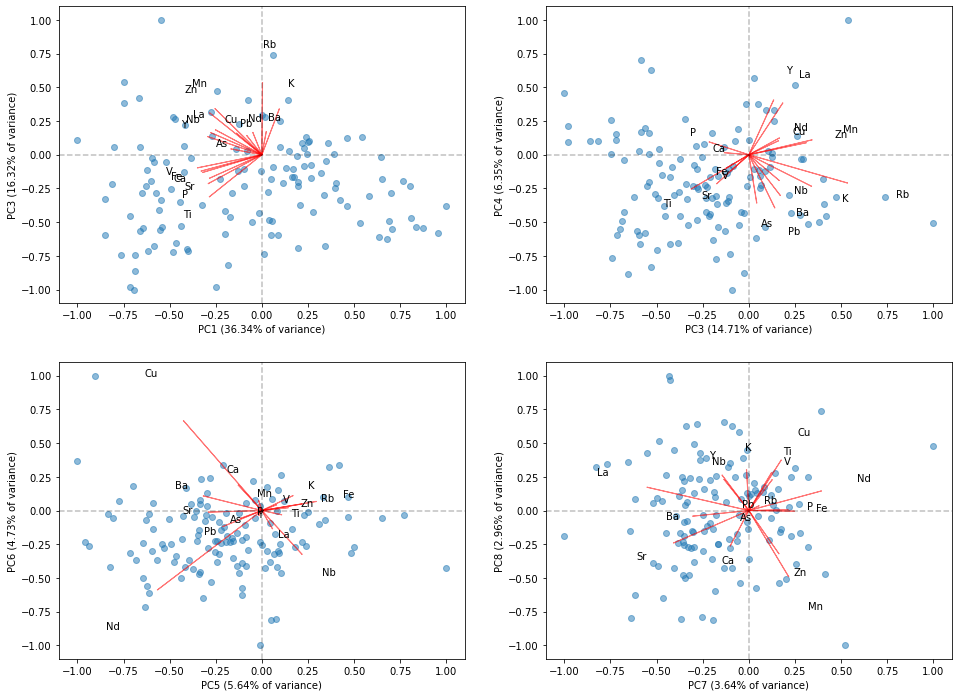

In [507]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

### biplot for PC1 and PC2
# vertical and horizontal lines through origin
axs[0,0].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[0,0].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[0,0].scatter(data_pca_norm["PC1"], data_pca_norm["PC3"], alpha=0.5)

# set axis labels
axs[0,0].set_xlabel(f"PC1 ({round(100*var[0], 2)}% of variance)")
axs[0,0].set_ylabel(f"PC3 ({round(100*var[1], 2)}% of variance)")

# loading plot
# ax2 = axs[0,0].twinx().twiny()
for element in elements:
    axs[0,0].arrow(0, 0, loadings.loc[element, "PC1"], loadings.loc[element, "PC3"], color="r", alpha=0.5)
    axs[0,0].text(loadings.loc[element, "PC1"] * 1.5, loadings.loc[element, "PC3"] * 1.5, element)


### biplot for PC3 and PC4
# vertical and horizontal lines through origin
axs[0,1].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[0,1].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[0,1].scatter(data_pca_norm["PC3"], data_pca_norm["PC4"], alpha=0.5)

# set axis labels
axs[0,1].set_xlabel(f"PC3 ({round(100*var[2], 2)}% of variance)")
axs[0,1].set_ylabel(f"PC4 ({round(100*var[3], 2)}% of variance)")

# loading plot
for element in elements:
    # axs[0,1]
    axs[0,1].arrow(0, 0, loadings.loc[element, "PC3"], loadings.loc[element, "PC4"], color="r", alpha=0.5)
    axs[0,1].text(loadings.loc[element, "PC3"] * 1.5, loadings.loc[element, "PC4"] * 1.5, element)


### biplot for PC5 and PC6
# vertical and horizontal lines through origin
axs[1,0].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[1,0].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[1,0].scatter(data_pca_norm["PC5"], data_pca_norm["PC6"], alpha=0.5)

# set axis labels
axs[1,0].set_xlabel(f"PC5 ({round(100*var[4], 2)}% of variance)")
axs[1,0].set_ylabel(f"PC6 ({round(100*var[5], 2)}% of variance)")

# loading plot
for element in elements:
    axs[1,0].arrow(0, 0, loadings.loc[element, "PC5"], loadings.loc[element, "PC6"], color="r", alpha=0.5)
    axs[1,0].text(loadings.loc[element, "PC5"] * 1.5, loadings.loc[element, "PC6"] * 1.5, element)


### biplot for PC7 and PC8
# vertical and horizontal lines through origin
axs[1,1].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[1,1].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[1,1].scatter(data_pca_norm["PC7"], data_pca_norm["PC8"], alpha=0.5)

# set axis labels
axs[1,1].set_xlabel(f"PC7 ({round(100*var[6], 2)}% of variance)")
axs[1,1].set_ylabel(f"PC8 ({round(100*var[7], 2)}% of variance)")

# loading plot
for element in elements:
    axs[1,1].arrow(0, 0, loadings.loc[element, "PC7"], loadings.loc[element, "PC8"], color="r", alpha=0.5)
    axs[1,1].text(loadings.loc[element, "PC7"] * 1.5, loadings.loc[element, "PC8"] * 1.5, element)

In [508]:
data_pca_norm
for pc in pc_list: 
    min_max_scaler = preprocessing.MinMaxScaler()
    data_pca_norm[pc] = min_max_scaler.fit_transform(np.array(data_pca_norm[pc]).reshape(-1, 1))


In [183]:
data_pca_norm.to_csv('../data/interim/data_pca.csv')

In [328]:
geology = pd.read_csv("../data/interim/underlying_geology.csv")

# spatial join failed, likely due to incorrect geometry in geology.shp; label manually
biotite_trachygabbro_samples = geology.iloc[geology[geology["UNIT_SYNTH"]=="Biotite trachygabbro"].index, :]
geology.iloc[geology[geology["sample_id"]=="TE2-054"].index, 2:] = biotite_trachygabbro_samples.iloc[0, 2:]
geology.iloc[geology[geology["sample_id"]=="TE2-055"].index, 2:] = biotite_trachygabbro_samples.iloc[0, 2:]

In [329]:
geology.head(n=23)

,sample_id,NUMBER,AGE,ROCK_NUM,ROCK_DESCR,SUITE_NUMB,SUITE,UNIT_ID,UNIT_SYNTH,UNIT_DESCR,CONTACT_TY
0,GR1-001,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
1,GR1-019,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
2,GR1-031,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
3,TE2-019,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
4,TE2-020,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
5,TE2-020F,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
6,TE2-026,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
7,TE2-027,0.0,Ordovician,1.0,Sedimentary,1.0,Richmond Group,1.0,"Calcareous siltstone and shale, siltstone, lim...","Calcareous siltstone and shale, siltstone, lim...",NaN
8,GR1-002,1.0,Cretaceous,2.0,Metamorphic,2.0,Hornfels,2.0,Hornfels,Hornfels and metasomatised hornfels; fine grai...,NaN
9,GR1-018,1.0,Cretaceous,2.0,Metamorphic,2.0,Hornfels,2.0,Hornfels,Hornfels and metasomatised hornfels; fine grai...,NaN


In [413]:
data_kNN = pd.merge(data_pca_norm, geology[["sample_id", "UNIT_SYNTH", "ROCK_DESCR"]], how="inner", left_on="sample_id", right_on="sample_id")

In [433]:
data_kNN.rename(columns={"UNIT_SYNTH": "unit", "ROCK_DESCR": "rock_type"}, inplace=True)

In [434]:
data_kNN[data_kNN["sample_id"]=="TE2-054"]

,Unnamed: 0,sample_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,comments,unit,rock_type
120,190,TE2-054,0.09428,0.550706,0.393147,0.27229,0.331009,0.526013,0.35094,0.747727,...,0.108283,0.14571,0.524746,0.338639,0.498035,0.677654,0.598394,NaN,Biotite trachygabbro,Igneous


Create train and test set from data

In [435]:
# test_samples
samples_train = []
samples_test = []
for unit in data_kNN["unit"].unique():
    samples = data_kNN.loc[data_kNN[data_kNN["unit"]==unit].index, "sample_id"]
    train, test = train_test_split(samples, test_size=0.25, random_state=1774)
    samples_train += list(train)
    samples_test += list(test)

data_train = data_kNN[data_kNN["sample_id"].isin(samples_train)]
data_test = data_kNN[data_kNN["sample_id"].isin(samples_test)]

In [436]:
x_train, y_train = data_train[pc_list], data_train["unit"]
x_test, y_test = data_test[pc_list], data_test["unit"]

In [483]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [484]:
y_predict = kNN.predict(x_test)

In [485]:
kNN.score(x_test, y_test)

0.29411764705882354

In [476]:
class_eval = dict.fromkeys(data_kNN["unit"].unique())
for unit in class_eval.keys(): 
    class_eval[unit] = [0, 0]

for prediction, label in zip(y_predict, y_test):
    if prediction == label:
        class_eval[label][0] += 1
    class_eval[label][1] +=1
for unit in class_eval.keys(): 
    class_eval[unit] = (class_eval[unit][0] / class_eval[unit][1], class_eval[unit][1])

In [441]:
class_eval

{'Igneous Breccia with fragment of units 3-12': (0.2, 5),
 'Coarse-grained nepheline diotite and monzonite': (0.375, 8),
 'Hornfels': (0.0, 2),
 'Calcareous siltstone and shale, siltstone, limesto': (0.5, 2),
 'Melagabbro and jacupirangite': (0.0, 3),
 'Anorthositic gabbro and leucogabbro': (0.0, 1),
 'Kaersutite gabbro': (0.4, 5),
 'Kaersutite-pyroxene gabbro': (0.0, 2),
 'peralkaline nepheline syenite and pegmatite': (0.5, 2),
 'nepheline syenite, porphyry and phonolite': (0.0, 1),
 'Biotite trachygabbro': (0.6666666666666666, 3)}

In [453]:
confusion = confusion_matrix(y_test, y_predict, labels=data_kNN["unit"].unique())
confusion

array([[1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 4],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2]])

In [489]:
confusion = pd.DataFrame(confusion, columns=data_kNN["unit"].unique())
confusion.insert(0, "prediction", data_kNN["unit"].unique())
confusion.to_csv("../data/interim/kNN_confusion_matrix.csv")

In [449]:
for val in zip(y_test, y_predict): 
    print(val)

('Coarse-grained nepheline diotite and monzonite', 'Coarse-grained nepheline diotite and monzonite')
('Igneous Breccia with fragment of units 3-12', 'Biotite trachygabbro')
('Coarse-grained nepheline diotite and monzonite', 'Biotite trachygabbro')
('Coarse-grained nepheline diotite and monzonite', 'Coarse-grained nepheline diotite and monzonite')
('Igneous Breccia with fragment of units 3-12', 'Coarse-grained nepheline diotite and monzonite')
('Coarse-grained nepheline diotite and monzonite', 'Anorthositic gabbro and leucogabbro')
('Igneous Breccia with fragment of units 3-12', 'Coarse-grained nepheline diotite and monzonite')
('nepheline syenite, porphyry and phonolite', 'Biotite trachygabbro')
('Coarse-grained nepheline diotite and monzonite', 'Biotite trachygabbro')
('Hornfels', 'Coarse-grained nepheline diotite and monzonite')
('Anorthositic gabbro and leucogabbro', 'Biotite trachygabbro')
('Hornfels', 'Biotite trachygabbro')
('Igneous Breccia with fragment of units 3-12', 'peralka